In [1]:
from ase.visualize import view
from ase import Atom, Atoms
from Complex_Gen.complex_structure import Ligand, Complex, Center_Geo_Type
from Complex_Gen.functional import ase_to_xyz, view_smiles, get_atoms_index

In [2]:
# Basic usage

# Define a ligand based on SMILES representation
ligand1 = Ligand(smiles="c1ccccc1CC=CO", binding_sites_idx=[[0,1,2,3,4,5]], sites_loc_idx=[0])

# Define a ligand based on ASE ATOMS object
def CO():
    C1 = Atom('C', (0, 0, 0))
    O1 = Atom('O', (0, 0, 1.2))
    return Atoms([C1, O1])

ligand2 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[1])
ligand3 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[2])
ligand4 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[3])
ligand5 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[4])
print(ligand1, ligand2)

Ligand(C9H10O) Ligand(CO)


In [3]:
# Define the complex based on center metal atom and coordination number
shape = Center_Geo_Type().trigonal_bipyramidal()

com = Complex(center_atom="Rh",
              ligands=[ligand1, ligand2, ligand3, ligand4, ligand5],
              shape=shape)

com.generate_complex()

print(com)


Complex:Rh[Ligand(C9H10O), Ligand(CO), Ligand(CO), Ligand(CO), Ligand(CO)]


In [4]:
# View the complex
view(com.complex)


<Popen: returncode: None args: ['D:\\anaconda\\envs\\Complex_Gen\\python.exe...>

In [5]:
# Convert into xyz format

xyz = ase_to_xyz(com.complex)

print(xyz)

29

Rh 0.00000000 0.00000000 0.00000000
C -1.00049222 -0.94332556 2.11999981
C 0.31996702 -1.31598450 2.11999981
C 1.34983257 -0.38947253 2.11999996
C 1.00522172 0.94883359 2.12000044
C -0.32855020 1.32540566 2.11999981
C -1.34597888 0.37454334 2.12000015
C -2.78043107 0.77220280 2.12000584
C -3.24323147 0.90033148 3.51093347
C -3.71355247 2.04589284 3.97963980
O -4.15749140 2.21078665 5.27483986
H -1.80974957 -1.68207321 2.11999487
H 0.57636542 -2.36474802 2.12000726
H 2.39043049 -0.66003397 2.11999837
H 1.77964983 1.70070776 2.11999768
H -0.62634792 2.36933762 2.11999766
H -3.40101691 -0.01663155 1.62212297
H -2.94778462 1.73265729 1.59936627
H -3.22089674 0.07129745 4.20948018
H -3.75983993 2.90685553 3.32950546
H -4.68152747 1.46739926 5.75321172
C 0.00000000 0.00000000 -2.18000000
O 0.00000000 0.00000000 -3.38000000
C 2.18000000 0.00000000 0.00000000
O 3.38000000 0.00000000 0.00000000
C -1.09000000 1.88793538 0.00000000
O -1.69000000 2.92716586 0.00000000
C -1.09000000 -1.88793538

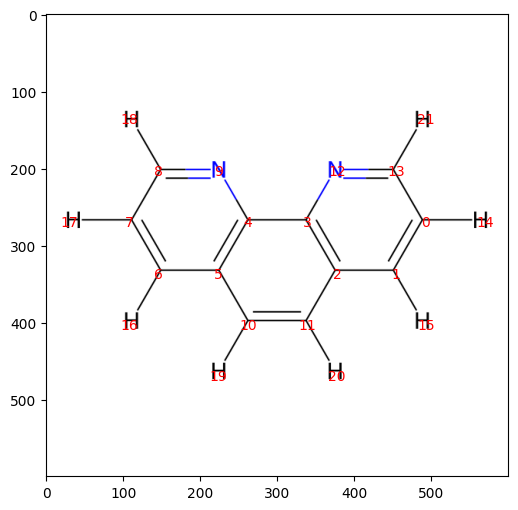

In [6]:
# More complex usage 1: bi-dentated ligand

ligand_smiles =r"C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1"
view_smiles(ligand_smiles)


In [7]:
# find the binding sites N atom index in the ligand
binding_sites_idx = get_atoms_index(ligand_smiles, "N")
print(binding_sites_idx)

ligand2_1 = Ligand(smiles=ligand_smiles, binding_sites_idx=binding_sites_idx, sites_loc_idx=[2,3])
ligand2_2 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[0])
ligand2_3 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[1])
ligand2_4 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[4])

shape = Center_Geo_Type().trigonal_bipyramidal()

com2 = Complex(center_atom="Rh",
              ligands=[ligand2_1, ligand2_2, ligand2_3, ligand2_4],
              shape=shape)

com2.generate_complex()

view(com2.complex)

[[9], [12]]


<Popen: returncode: None args: ['D:\\anaconda\\envs\\Complex_Gen\\python.exe...>

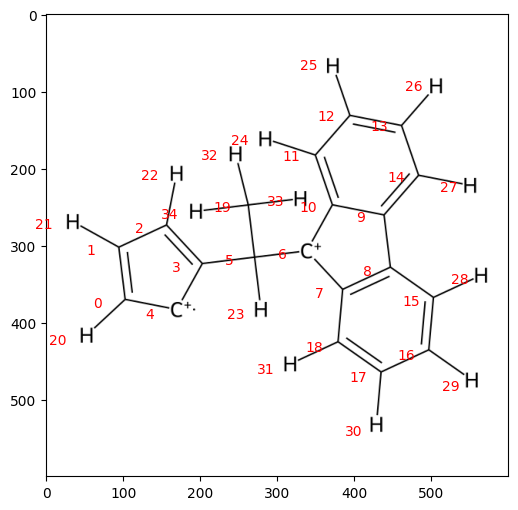

In [8]:
# More complex usage 2: bi-dentated ligand with two ring sites

ligand_smiles = r"C1=CC=C([C+]1)C([C+]2C4=C(C3=C2C=CC=C3)C=CC=C4)C"
view_smiles(ligand_smiles)

In [9]:
# find the binding sites 5-C rings index in the ligand
binding_sites_idx = get_atoms_index(ligand_smiles, ring_type=5)
print(binding_sites_idx)

ligand3_1 = Ligand(smiles=ligand_smiles, binding_sites_idx=binding_sites_idx, sites_loc_idx=[0,1])
ligand3_2 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[2])
ligand3_3 = Ligand(structure=CO(), binding_sites_idx=[[0]], sites_loc_idx=[3])

shape = Center_Geo_Type().tetrahedral()

com3 = Complex(center_atom="Zr",
              ligands=[ligand3_1, ligand3_2, ligand3_3],
              shape=shape)

com3.generate_complex()

view(com3.complex)

[[0, 1, 2, 3, 4], [6, 7, 8, 9, 10]]


<Popen: returncode: None args: ['D:\\anaconda\\envs\\Complex_Gen\\python.exe...>